In [1]:
using DataFrames
using DataStructures
using CSV
using StatsPlots
using Distributions
using Interpolations
using KernelDensity
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
df2011 = DataFrame(CSV.File("../../ThinkBayes2/data/showcases.2011.csv"));
df2012 = DataFrame(CSV.File("../../ThinkBayes2/data/showcases.2012.csv"));
df2011 = dropmissing(df2011)
df2012 = dropmissing(df2012)
df2011 = permutedims(df2011, 1)
df2012 = permutedims(df2012, 1)

,Column1,Showcase 1,Showcase 2,Bid 1,Bid 2,Difference 1,Difference 2
,String,String7,String7,String7,String7,String7,String7
1,Sep. 24,40811,62485,22000,40500,18811,21985
2,Sep. 25,31259,32972,10000,21000,21259,11972
3,Sep. 26,41943,24755,39500,22500,2443,2255
4,Sep. 27,24946,34665,21513,32000,3433,2665
5,Sep. 28,26257,48635,23420,35000,2837,13635
6,Oct. 1,49928,42621,36500,34000,13428,8621
7,Oct. 2,30744,22253,26500,18000,4244,4253
8,Oct. 3,37671,24251,42000,26000,-4329,-1749
9,Oct. 4,32255,45871,25000,29000,7255,16871


In [3]:
function stoi(df)
    for name in names(df)[2:end]
        df[!, name] = [parse(Float64, x[1:end]) for x in df[!, name]];
    end
end

stoi (generic function with 1 method)

In [4]:
stoi(df2011)

In [5]:
stoi(df2012)

In [6]:
df = vcat(df2011, df2012)
df = df[:, names(df)[2:end]]
first(df, 3)

,Showcase 1,Showcase 2,Bid 1,Bid 2,Difference 1,Difference 2
,Float64,Float64,Float64,Float64,Float64,Float64
1,50969.0,45429.0,42000.0,34000.0,8969.0,11429.0
2,21901.0,34061.0,14000.0,59900.0,7901.0,-25839.0
3,32815.0,53186.0,32000.0,45000.0,815.0,8186.0


In [7]:
maximum(df[:, "Showcase 1"]), maximum(df[:, "Showcase 2"])

(58342.0, 71628.0)

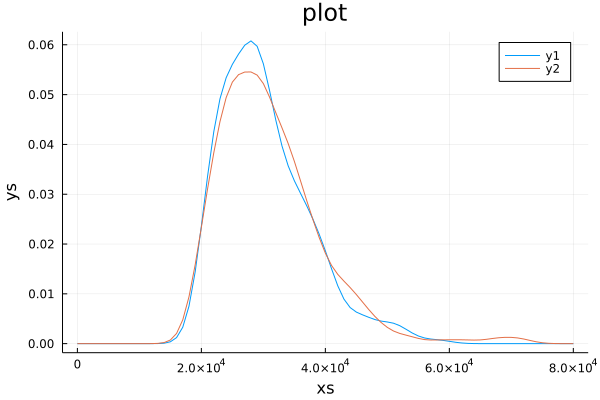

In [8]:
prior1 = kde_from_sample(df[:, "Showcase 1"], 0, 80000, 81)
prior2 = kde_from_sample(df[:, "Showcase 2"], 0, 80000, 81)
plot(prior1)
plot!(prior2)

## Distribution of Error 

In [10]:
sample_diff1 = df[:, "Bid 1"] .- df[:, "Showcase 1"]
sample_diff2 = df[:, "Bid 2"] .- df[:, "Showcase 2"];

In [11]:
kde_diff1 = kde_from_sample(sample_diff1, -40000, 20000, 61)
kde_diff2 = kde_from_sample(sample_diff2, -40000, 20000, 61);

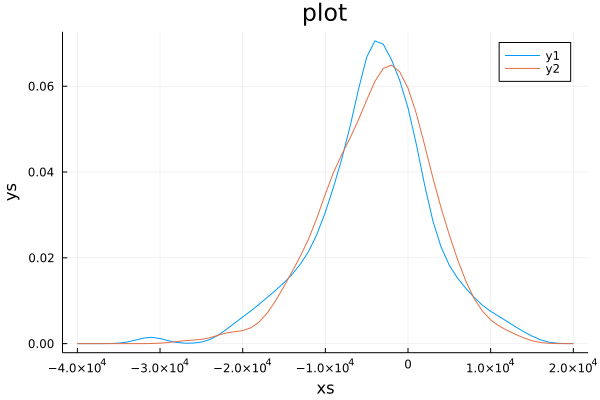

In [12]:
plot(kde_diff1)
plot!(kde_diff2)

In [14]:
mean_diff1 = mean(sample_diff1)
std_diff1 = std(sample_diff1)
mean_diff1, std_diff1

(-4116.3961661341855, 6899.909806377118)

In [15]:
error_dist1 = Normal(0, std_diff1)

Normal{Float64}(μ=0.0, σ=6899.909806377118)

In [16]:
pdf(error_dist1, -100)

5.78124056400869e-5

## Update

In [18]:
guess1 = 23000
error1 = guess1 .- values(prior1);

In [20]:
likelihood = [pdf(error_dist1, x) for x in error1];

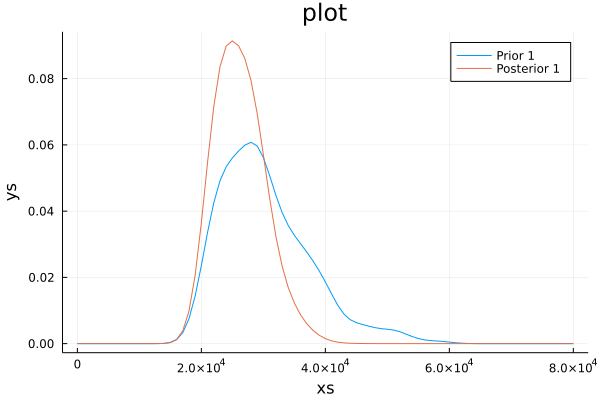

In [23]:
posterior1 = prior1 * likelihood
plot(prior1, label="Prior 1")
plot!(posterior1, label="Posterior 1")

In [24]:
mean(prior1), mean(posterior1)

(30299.4888211387, 26218.949835537245)

_exercise 9.2_

In [25]:
mean_diff2 = mean(sample_diff2)
std_diff2 = std(sample_diff2)
mean_diff2, std_diff2

(-3675.891373801917, 6886.260711323408)

In [26]:
error_dist2 = Normal(0, std_diff2)

Normal{Float64}(μ=0.0, σ=6886.260711323408)

In [27]:
guess2 = 38000
error2 = guess2 .- values(prior2);

In [28]:
likelihood = [pdf(error_dist2, x) for x in error2];

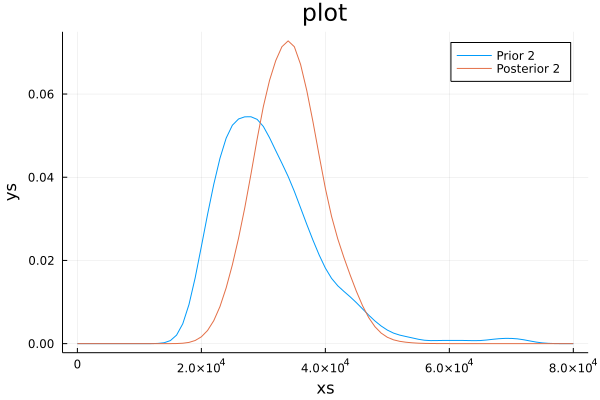

In [29]:
posterior2 = prior2 * likelihood
plot(prior2, label="Prior 2")
plot!(posterior2, label="Posterior 2")

In [30]:
mean(prior2), mean(posterior2)

(31047.678992665347, 34211.254966227556)

## Probability of Winning